<a href="https://colab.research.google.com/github/Pverma-1234/Advance-Python-Concepts/blob/main/Predictive_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
)

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")
print("All libraries imported successfully!")


All libraries imported successfully!


In [ ]:
# Load dataset
df = pd.read_excel("Digital Wellbeing & Cognitive Fatigue Tracker (Responses) (2).xlsx")

# Rename columns
df.columns = [
    'timestamp', 'email', 'screen_time', 'social_media_time',
    'phone_unlocks', 'fatigue_level', 'mental_clarity',
    'focus_difficulty', 'eye_strain', 'sleep_quality',
    'productivity_drop', 'breaks_taken', 'mood',
    'stress_due_screen', 'task_switching_issue',
    'focus_shift_issue', 'fatigue_management_steps'
]



print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values: {total_missing}")

if total_missing > 0:
    print("\nColumns with missing values:")
    for col, count in df.isnull().sum().items():
        if count > 0:
            print(f"  - {col}: {count} ({count/len(df)*100:.2f}%)")

print(f"\nDuplicate rows: {df.duplicated().sum()}")

print(f"\nTotal columns: {len(df.columns)}")
print("\nColumn names and data types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i:2d}. {col:30s} - {dtype}")

print("\nSample data:")
print(df.head(3))



def clean_distribution(series, top_n=5):
    counts = series.value_counts()
    top = counts.head(top_n)
    others = counts[top_n:].sum()
    if others > 0:
        top['Others'] = others
    return top



print("\n1. Fatigue Level Distribution (Cleaned):")
print(clean_distribution(df['fatigue_level'], 6))

print("\n2. Mood Distribution (Cleaned):")
print(clean_distribution(df['mood'], 5))

print("\n3. Sleep Quality Distribution (Cleaned):")
print(clean_distribution(df['sleep_quality'], 6))

print("\n4. Stress Due to Screen Usage (Cleaned):")
print(clean_distribution(df['stress_due_screen'], 5))

print("\n5. Breaks Taken Distribution (Cleaned):")
print(clean_distribution(df['breaks_taken'], 5))

print("\n6. Fatigue Management Steps Distribution (Cleaned):")
print(clean_distribution(df['fatigue_management_steps'], 6))


print("\nScreen Time:")
print(" Samples:", df['screen_time'].unique()[:5])
print(" Type:", df['screen_time'].dtype)

print("\nSocial Media Time:")
print(" Samples:", df['social_media_time'].unique()[:5])
print(" Type:", df['social_media_time'].dtype)

print("\nPhone Unlocks:")
print(" Samples:", df['phone_unlocks'].unique()[:5])
print(" Type:", df['phone_unlocks'].dtype)



Dataset Shape: 524 rows × 17 columns

Total missing values: 1898

Columns with missing values:
  - email: 494 (94.27%)
  - productivity_drop: 200 (38.17%)
  - breaks_taken: 200 (38.17%)
  - mood: 202 (38.55%)
  - stress_due_screen: 200 (38.17%)
  - task_switching_issue: 201 (38.36%)
  - focus_shift_issue: 201 (38.36%)
  - fatigue_management_steps: 200 (38.17%)

Duplicate rows: 0

Total columns: 17

Column names and data types:
 1. timestamp                      - object
 2. email                          - object
 3. screen_time                    - object
 4. social_media_time              - object
 5. phone_unlocks                  - object
 6. fatigue_level                  - object
 7. mental_clarity                 - int64
 8. focus_difficulty               - object
 9. eye_strain                     - int64
10. sleep_quality                  - object
11. productivity_drop              - float64
12. breaks_taken                   - object
13. mood                           - obje

In [ ]:
import numpy as np
import pandas as pd

print("Handling Duplicate Columns")



print("No duplicate columns found")

# Removing Unnecessary Columns


print("\n--- Step 2: Removing Unnecessary Columns ---")

columns_to_drop = ['timestamp', 'email']
existing_to_drop = [col for col in columns_to_drop if col in df.columns]

if existing_to_drop:
    print(f"Dropping columns: {existing_to_drop}")
    df.drop(existing_to_drop, axis=1, inplace=True)
    print(f" Removed {len(existing_to_drop)} columns")
else:
    print("No columns to drop")

print(f"Remaining columns: {len(df.columns)}")

# Cleaning Numeric Columns


def parse_range(val):
    val = str(val).lower().strip()

    if 'less' in val:
        return 0.5

    if 'more' in val:
        nums = [int(s) for s in val.split() if s.isdigit()]
        return nums[0] + 1 if nums else np.nan

    if '-' in val or '–' in val:
        nums = [
            float(x) for x in val.replace('–', '-').split('-')
            if x.replace('.', '').isdigit()
        ]
        return round(np.mean(nums), 2) if nums else np.nan

    return float(val) if val.replace('.', '').isdigit() else np.nan


# Screen Time
print("\nCleaning 'screen_time' column...")
print(f"  Sample before: {df['screen_time'].head(3).tolist()}")
print(f"  Data type before: {df['screen_time'].dtype}")

df['screen_time'] = df['screen_time'].apply(parse_range)

print(f"  Sample after: {df['screen_time'].head(3).tolist()}")
print(f"  Data type after: {df['screen_time'].dtype}")
print(f"  ✓ Converted to numeric (Mean: {df['screen_time'].mean():.2f} hours)")


# Social Media Time
print("\nCleaning 'social_media_time' column...")
print(f"  Sample before: {df['social_media_time'].head(3).tolist()}")
print(f"  Data type before: {df['social_media_time'].dtype}")

df['social_media_time'] = df['social_media_time'].apply(parse_range)

print(f"  Sample after: {df['social_media_time'].head(3).tolist()}")
print(f"  Data type after: {df['social_media_time'].dtype}")
print(f"  ✓ Converted to numeric (Mean: {df['social_media_time'].mean():.2f} hours)")


# Phone Unlocks
print("\nCleaning 'phone_unlocks' column...")
print(f"  Sample before: {df['phone_unlocks'].head(3).tolist()}")
print(f"  Data type before: {df['phone_unlocks'].dtype}")

df['phone_unlocks'] = df['phone_unlocks'].apply(parse_range)

print(f"  Sample after: {df['phone_unlocks'].head(3).tolist()}")
print(f"  Data type after: {df['phone_unlocks'].dtype}")
print(f"  ✓ Converted to numeric (Mean: {df['phone_unlocks'].mean():.2f})")




print("\nMissing values before filling:")
missing_before = df.isnull().sum()
missing_before = missing_before[missing_before > 0]

if not missing_before.empty:
    for col, count in missing_before.items():
        print(f"  - {col}: {count} ({count/len(df)*100:.2f}%)")
else:
    print("  No missing values found")

# Fill missing values
for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])



print(f"\nFinal dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Duplicate rows: {df.duplicated().sum()}")

print("\nData types summary:")
print(df.dtypes.value_counts())

print("\nNumeric columns statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    print(df[numeric_cols].describe())


Handling Duplicate Columns
No duplicate columns found

--- Step 2: Removing Unnecessary Columns ---
Dropping columns: ['timestamp', 'email']
 Removed 2 columns
Remaining columns: 15

Cleaning 'screen_time' column...
  Sample before: ['2-4 hours', '2-4 hours', '4-6 hours']
  Data type before: object
  Sample after: [2.0, 2.0, 4.0]
  Data type after: float64
  ✓ Converted to numeric (Mean: 3.68 hours)

Cleaning 'social_media_time' column...
  Sample before: ['1–2 hours', '1–2 hours', '2–3 hours']
  Data type before: object
  Sample after: [1.0, 1.0, 2.0]
  Data type after: float64
  ✓ Converted to numeric (Mean: 16.87 hours)

Cleaning 'phone_unlocks' column...
  Sample before: ['41–60', '21–40', '61–80']
  Data type before: object
  Sample after: [50.5, 30.5, 70.5]
  Data type after: float64
  ✓ Converted to numeric (Mean: 34.17)

Missing values before filling:
  - productivity_drop: 200 (38.17%)
  - breaks_taken: 200 (38.17%)
  - mood: 202 (38.55%)
  - stress_due_screen: 200 (38.17%)
  

Starting Module 4: Exploratory Data Analysis


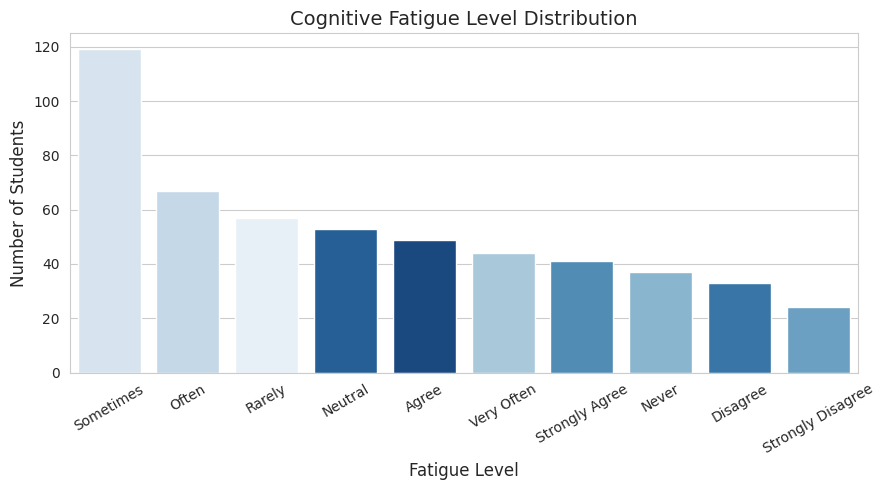

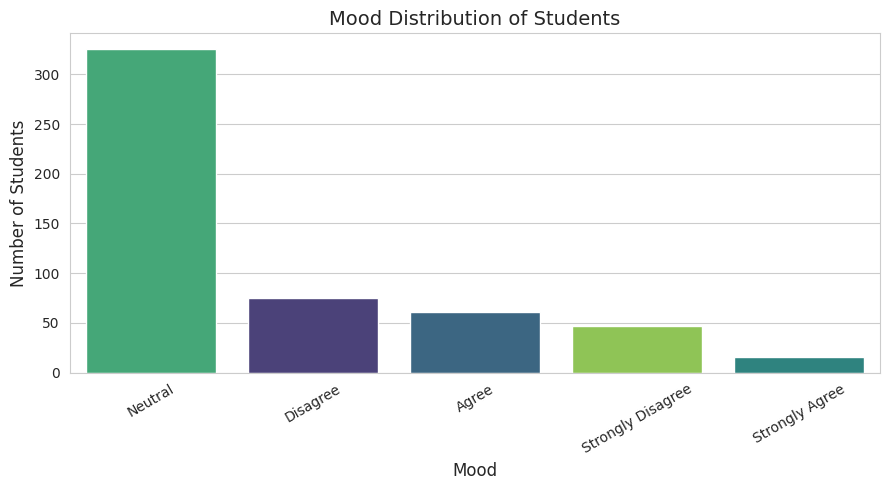

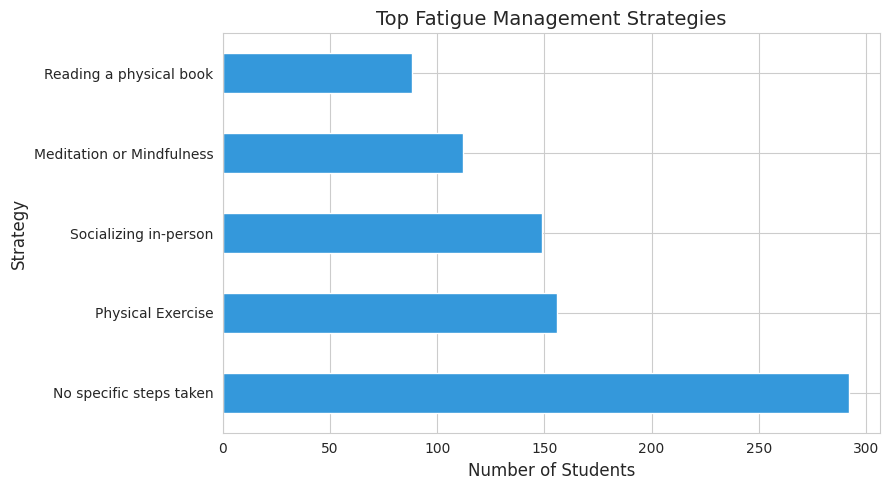

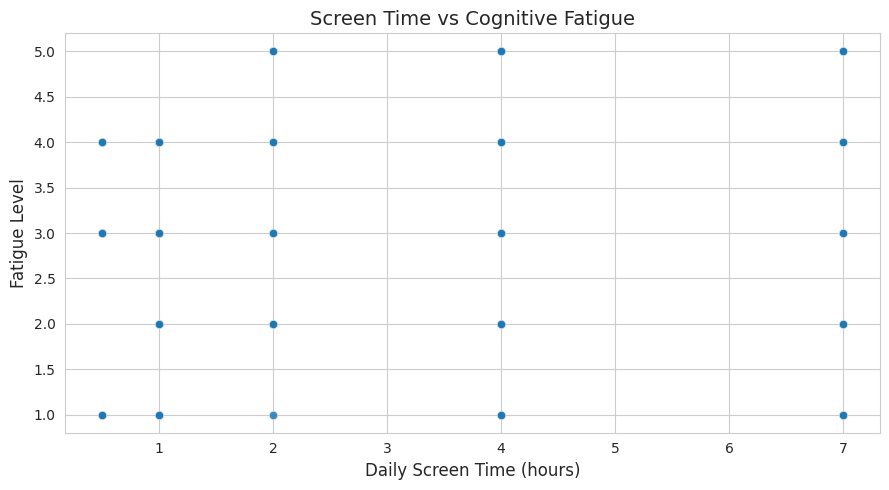

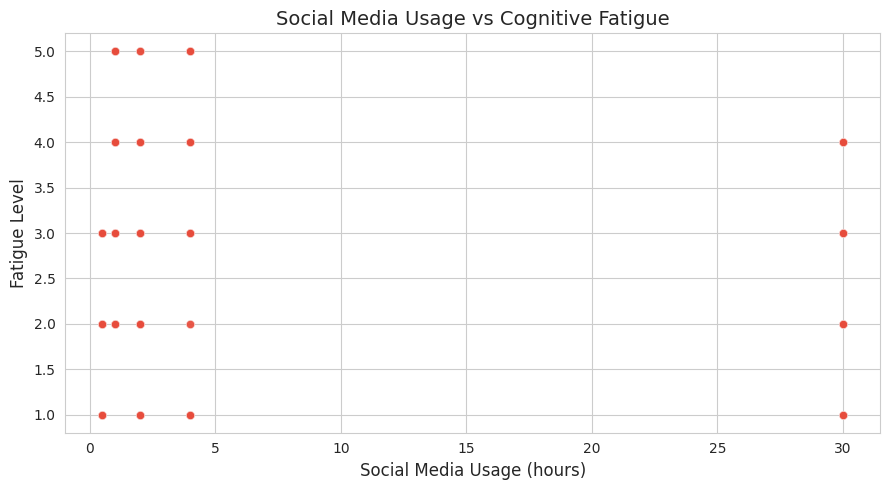

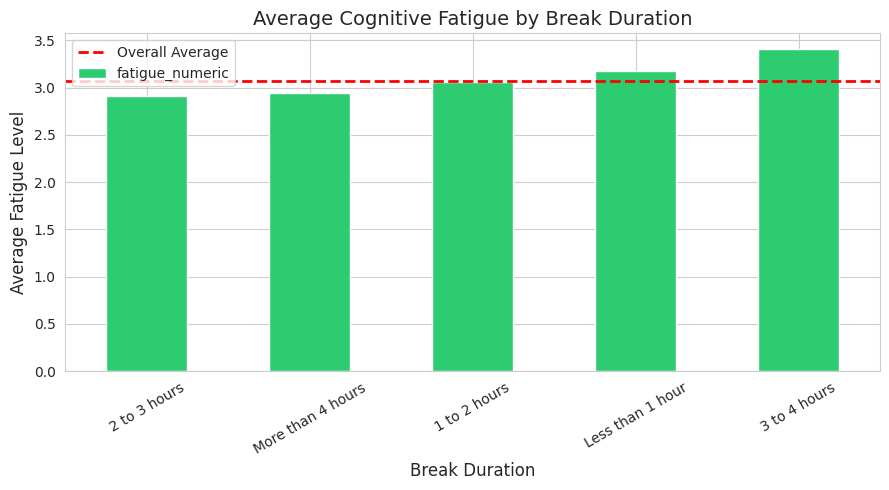

Screen Time – Fatigue correlation: 0.320
Social Media Time – Fatigue correlation: -0.031


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Starting Module 4: Exploratory Data Analysis")


plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

sns.set_style("whitegrid")


# Create numeric fatigue score
fatigue_map = {
    'Never': 1,
    'Rarely': 2,
    'Sometimes': 3,
    'Often': 4,
    'Very Often': 5
}

df['fatigue_numeric'] = df['fatigue_level'].map(fatigue_map)


plt.figure()
sns.countplot(
    x='fatigue_level',
    data=df,
    order=df['fatigue_level'].value_counts().index,
    hue='fatigue_level',
    palette='Blues',
    legend=False
)
plt.title('Cognitive Fatigue Level Distribution')
plt.xlabel('Fatigue Level')
plt.ylabel('Number of Students')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


plt.figure()
sns.countplot(
    x='mood',
    data=df,
    order=df['mood'].value_counts().index,
    hue='mood',
    palette='viridis',
    legend=False
)
plt.title('Mood Distribution of Students')
plt.xlabel('Mood')
plt.ylabel('Number of Students')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



steps_series = df['fatigue_management_steps'].dropna().str.split(',')
all_steps = steps_series.explode().str.strip()

top_steps = all_steps.value_counts().head(6)

plt.figure()
top_steps.plot(kind='barh', color='#3498db')
plt.title('Top Fatigue Management Strategies')
plt.xlabel('Number of Students')
plt.ylabel('Strategy')
plt.tight_layout()
plt.show()



plt.figure()
sns.scatterplot(
    x='screen_time',
    y='fatigue_numeric',
    data=df,
    color='#1f77b4',
    alpha=0.6
)
plt.title('Screen Time vs Cognitive Fatigue')
plt.xlabel('Daily Screen Time (hours)')
plt.ylabel('Fatigue Level')
plt.tight_layout()
plt.show()


plt.figure()
sns.scatterplot(
    x='social_media_time',
    y='fatigue_numeric',
    data=df,
    color='#e74c3c',
    alpha=0.6
)
plt.title('Social Media Usage vs Cognitive Fatigue')
plt.xlabel('Social Media Usage (hours)')
plt.ylabel('Fatigue Level')
plt.tight_layout()
plt.show()


plt.figure()
df.groupby('breaks_taken')['fatigue_numeric'].mean().sort_values().plot(
    kind='bar',
    color='#2ecc71'
)

plt.axhline(
    df['fatigue_numeric'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label='Overall Average'
)

plt.title('Average Cognitive Fatigue by Break Duration')
plt.xlabel('Break Duration')
plt.ylabel('Average Fatigue Level')
plt.xticks(rotation=30)
plt.legend()
plt.tight_layout()
plt.show()


print(f"Screen Time – Fatigue correlation: {df['screen_time'].corr(df['fatigue_numeric']):.3f}")
print(f"Social Media Time – Fatigue correlation: {df['social_media_time'].corr(df['fatigue_numeric']):.3f}")


Starting Module 5: Outlier Removal

Removing outliers from 'screen_time'...
  Lower Bound: -2.50
  Upper Bound: 9.50
  Rows before: 524
  Rows after : 524


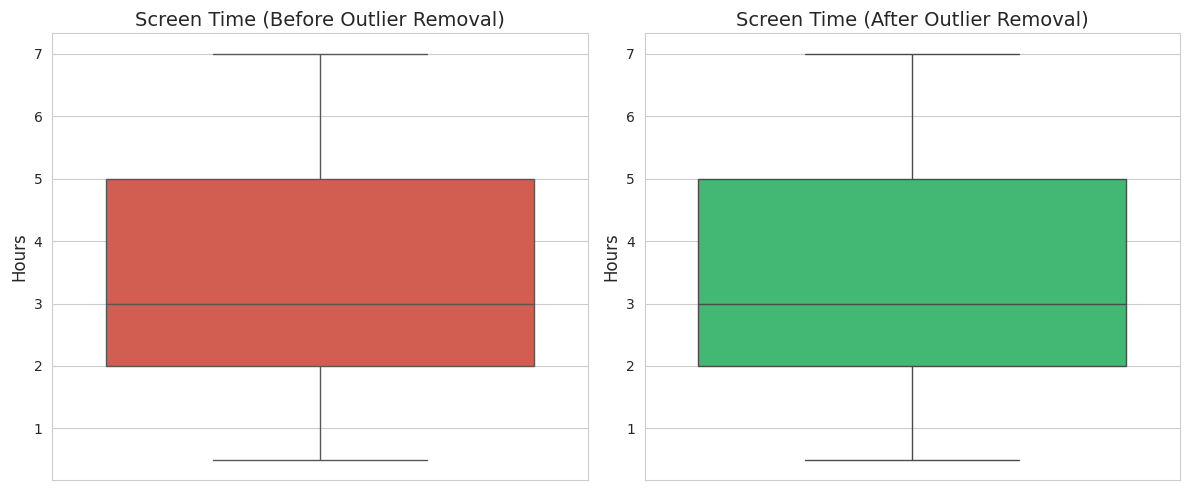


Removing outliers from 'social_media_time'...
  Lower Bound: -42.50
  Upper Bound: 73.50
  Rows before: 524
  Rows after : 524


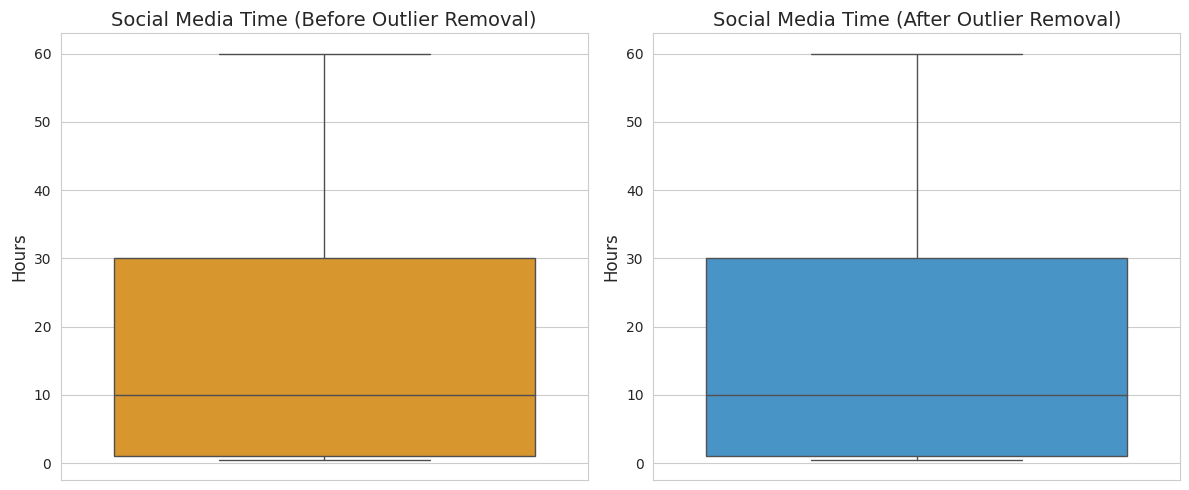


Outlier removal completed successfully!
Final dataset shape after outlier removal: (524, 16)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("Starting Module 5: Outlier Removal")

sns.set_style("whitegrid")


# IQR outlier removal

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clean_data = data[
        (data[column] >= lower_bound) &
        (data[column] <= upper_bound)
    ]

    return clean_data, lower_bound, upper_bound



print("\nRemoving outliers from 'screen_time'...")

df_screen_clean, lb_screen, ub_screen = remove_outliers_iqr(df, 'screen_time')

print(f"  Lower Bound: {lb_screen:.2f}")
print(f"  Upper Bound: {ub_screen:.2f}")
print(f"  Rows before: {df.shape[0]}")
print(f"  Rows after : {df_screen_clean.shape[0]}")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df['screen_time'], ax=axes[0], color='#e74c3c')
axes[0].set_title('Screen Time (Before Outlier Removal)')
axes[0].set_ylabel('Hours')

sns.boxplot(y=df_screen_clean['screen_time'], ax=axes[1], color='#2ecc71')
axes[1].set_title('Screen Time (After Outlier Removal)')
axes[1].set_ylabel('Hours')

plt.tight_layout()
plt.show()



print("\nRemoving outliers from 'social_media_time'...")

df_final, lb_social, ub_social = remove_outliers_iqr(df_screen_clean, 'social_media_time')

print(f"  Lower Bound: {lb_social:.2f}")
print(f"  Upper Bound: {ub_social:.2f}")
print(f"  Rows before: {df_screen_clean.shape[0]}")
print(f"  Rows after : {df_final.shape[0]}")


fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_screen_clean['social_media_time'], ax=axes[0], color='#f39c12')
axes[0].set_title('Social Media Time (Before Outlier Removal)')
axes[0].set_ylabel('Hours')

sns.boxplot(y=df_final['social_media_time'], ax=axes[1], color='#3498db')
axes[1].set_title('Social Media Time (After Outlier Removal)')
axes[1].set_ylabel('Hours')

plt.tight_layout()
plt.show()


df = df_final.copy()

print("\nOutlier removal completed successfully!")
print(f"Final dataset shape after outlier removal: {df.shape}")


In [ ]:
from sklearn.preprocessing import LabelEncoder



df['high_fatigue'] = (df['fatigue_numeric'] >= 4).astype(int)
df['high_eye_strain'] = (df['eye_strain'] >= 4).astype(int)
df['high_productivity_drop'] = (df['productivity_drop'] >= 4).astype(int)

df['high_screen_stress'] = df['stress_due_screen'].isin(
    ['Agree', 'Strongly Agree']
).astype(int)



categorical_cols = [
    'fatigue_level',
    'focus_difficulty',
    'sleep_quality',
    'breaks_taken',
    'mood',
    'stress_due_screen',
    'task_switching_issue',
    'focus_shift_issue'
]

for col in categorical_cols:
    df[col + '_encoded'] = LabelEncoder().fit_transform(df[col].astype(str))






INSIGHT 1: Understanding Cognitive Fatigue Levels
How digital usage patterns predict fatigue levels (1–5 scale)

Model Performance Comparison:
               Model       MAE      RMSE        R2
0  Linear Regression  0.873923  1.081105  0.093255
1      Decision Tree  0.073846  0.364586  0.896878
2      Random Forest  0.210353  0.469512  0.828982


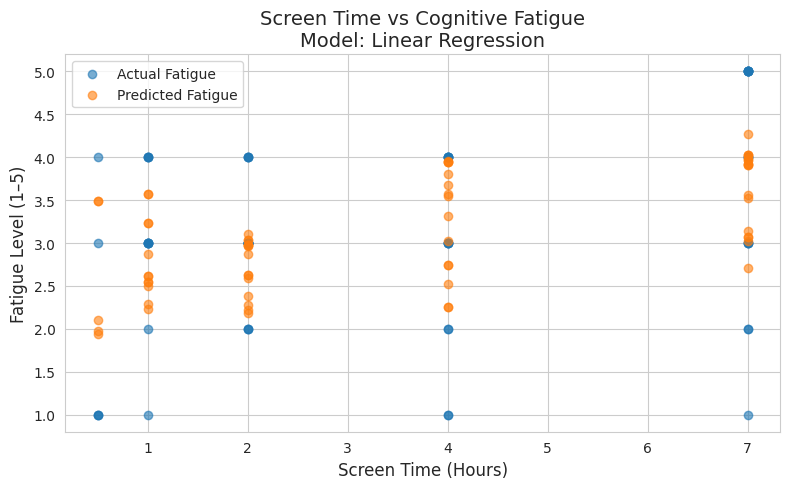


INSIGHT 2: Identifying High Cognitive Fatigue Risk
Detecting students with high cognitive fatigue

Model Performance Comparison:
                    Model  Accuracy  Precision    Recall        F1
0     Logistic Regression  0.600000   0.500000  0.269231  0.350000
1             Naive Bayes  0.646154   0.578947  0.423077  0.488889
2  Support Vector Machine  0.615385   0.545455  0.230769  0.324324


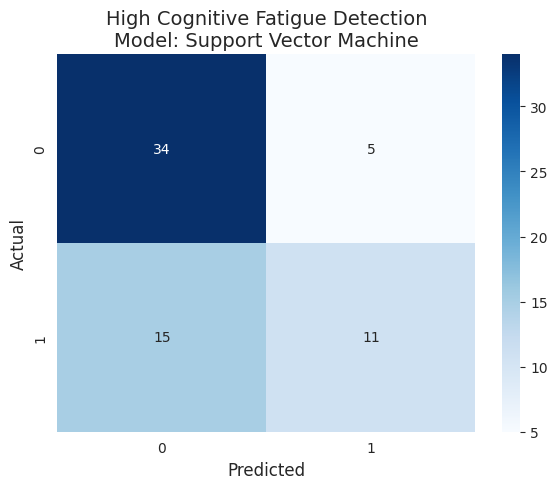


INSIGHT 3: Predicting Productivity Drop
Analyzing impact of fatigue on academic productivity

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall        F1
0  Logistic Regression  0.646154   0.588235  0.689655  0.634921
1        Decision Tree  0.861538   0.857143  0.827586  0.842105
2        Random Forest  0.969231   0.935484  1.000000  0.966667

DECISION TREE MODEL INTERPRETATION
Understanding how features lead to High Cognitive Fatigue


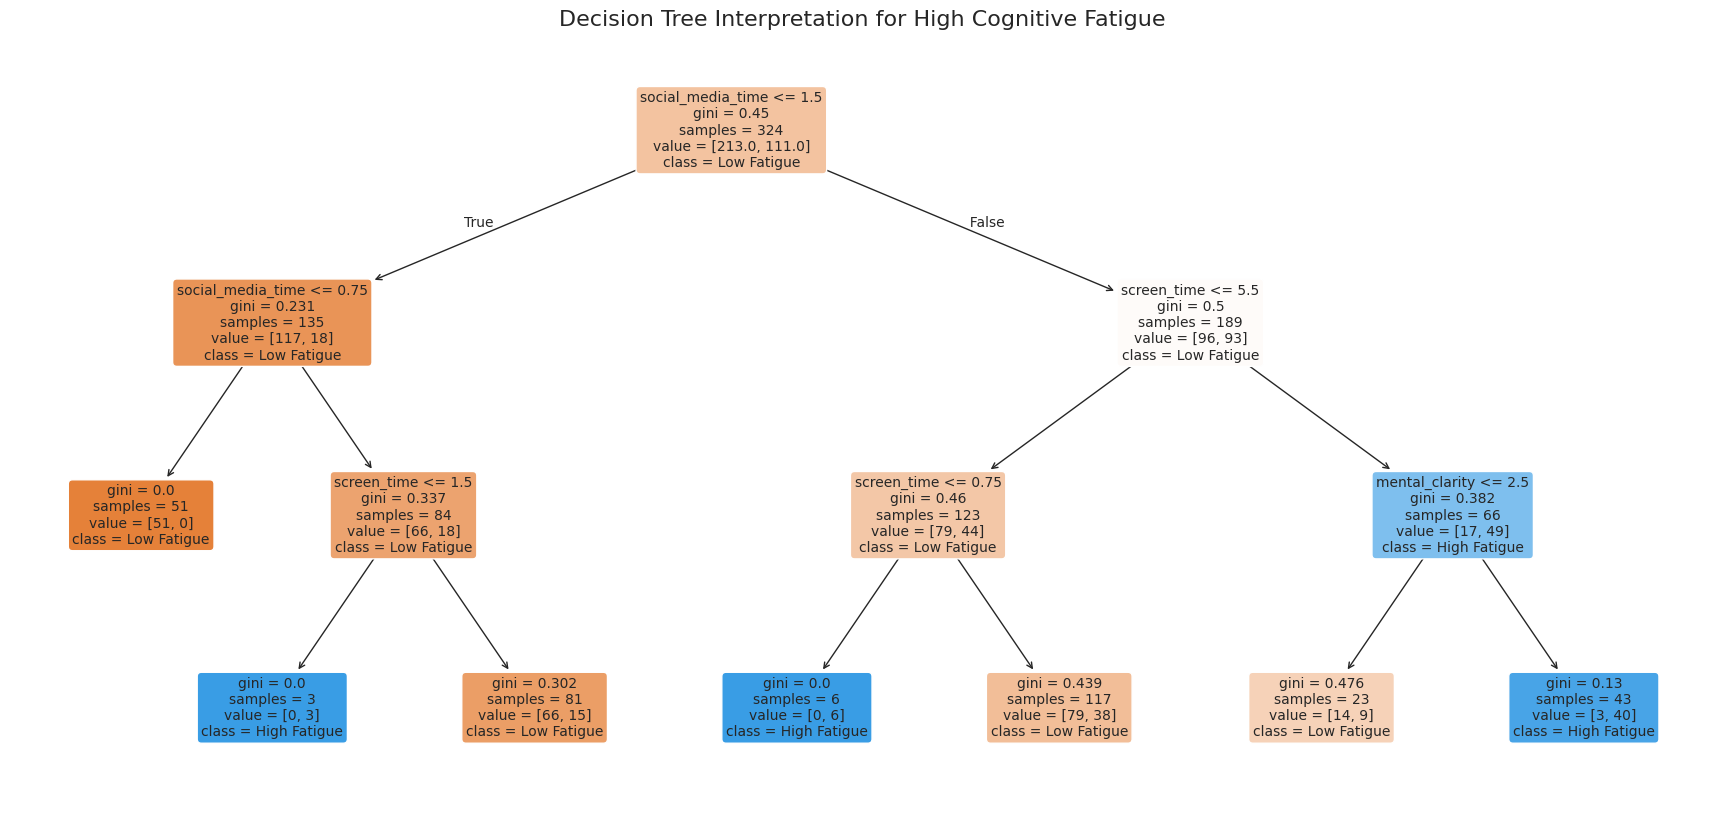


INSIGHT 4: Detecting Screen-Induced Stress
Identifying students stressed due to excessive screen usage

Model Performance Comparison:
                    Model  Accuracy  Precision  Recall        F1
0     Logistic Regression  0.584615   0.000000    0.00  0.000000
1           Decision Tree  0.784615   0.607143    0.85  0.708333
2  Support Vector Machine  0.723077   1.000000    0.10  0.181818


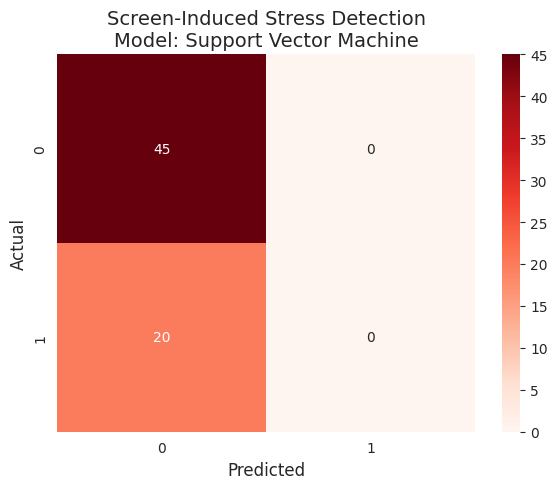


INSIGHT 5: Understanding Focus Shift Issues
Classifying attention and focus-related problems

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall        F1
0        Decision Tree  0.969231   0.973333  0.969231  0.969597
1        Random Forest  0.953846   0.959784  0.953846  0.954412
2  K-Nearest Neighbors  0.600000   0.580256  0.600000  0.584233


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
)


df = df.dropna().reset_index(drop=True)


def train_and_evaluate(X, y, models, task='classification'):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    results = []
    avg_type = 'binary' if y.nunique() == 2 else 'weighted'

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        if task == 'regression':
            results.append({
                'Model': name,
                'MAE': mean_absolute_error(y_test, y_pred),
                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
                'R2': r2_score(y_test, y_pred)
            })
        else:
            results.append({
                'Model': name,
                'Accuracy': accuracy_score(y_test, y_pred),
                'Precision': precision_score(y_test, y_pred, average=avg_type, zero_division=0),
                'Recall': recall_score(y_test, y_pred, average=avg_type, zero_division=0),
                'F1': f1_score(y_test, y_pred, average=avg_type, zero_division=0)
            })

    return pd.DataFrame(results), X_test, y_test


print("="*70)
print("INSIGHT 1: Understanding Cognitive Fatigue Levels")
print("How digital usage patterns predict fatigue levels (1–5 scale)")
print("="*70)

X = df[['screen_time', 'social_media_time',
        'phone_unlocks', 'eye_strain', 'mental_clarity']]
y = df['fatigue_numeric']

models_1 = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

comp1, X_test, y_test = train_and_evaluate(X, y, models_1, task='regression')
print("\nModel Performance Comparison:")
print(comp1)

# Regression Graph
lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)

plt.figure(figsize=(8,5))
plt.scatter(X_test['screen_time'], y_test, alpha=0.6, label='Actual Fatigue')
plt.scatter(X_test['screen_time'], y_pred, alpha=0.6, label='Predicted Fatigue')
plt.xlabel('Screen Time (Hours)')
plt.ylabel('Fatigue Level (1–5)')
plt.title('Screen Time vs Cognitive Fatigue\nModel: Linear Regression')
plt.legend()
plt.tight_layout()
plt.show()



print("\n" + "="*70)
print("INSIGHT 2: Identifying High Cognitive Fatigue Risk")
print("Detecting students with high cognitive fatigue")
print("="*70)

X = df[['screen_time', 'social_media_time',
        'eye_strain', 'mental_clarity',
        'focus_difficulty_encoded']]
y = df['high_fatigue']

models_2 = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC()
}

comp2, X_test, y_test = train_and_evaluate(X, y, models_2)
print("\nModel Performance Comparison:")
print(comp2)

svm = SVC()
svm.fit(X, y)
y_pred = svm.predict(X_test)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title('High Cognitive Fatigue Detection\nModel: Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()




print("\n" + "="*70)
print("INSIGHT 3: Predicting Productivity Drop")
print("Analyzing impact of fatigue on academic productivity")
print("="*70)

X = df[['screen_time', 'social_media_time',
        'fatigue_numeric', 'eye_strain',
        'focus_shift_issue_encoded']]
y = df['high_productivity_drop']

models_3 = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100)
}

comp3, _, _ = train_and_evaluate(X, y, models_3)
print("\nModel Performance Comparison:")
print(comp3)


from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

print("\n" + "="*70)
print("DECISION TREE MODEL INTERPRETATION")
print("Understanding how features lead to High Cognitive Fatigue")
print("="*70)


X = df[['screen_time', 'social_media_time',
        'eye_strain', 'mental_clarity',
        'focus_difficulty_encoded']]

# Target Variable
y = df['high_fatigue']


dt_model = DecisionTreeClassifier(
    max_depth=3,
    random_state=42
)

dt_model.fit(X, y)


plt.figure(figsize=(22, 10))

plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['Low Fatigue', 'High Fatigue'],
    filled=True,
    rounded=True,
    fontsize=10
)

plt.title("Decision Tree Interpretation for High Cognitive Fatigue", fontsize=16)
plt.show()



print("\n" + "="*70)
print("INSIGHT 4: Detecting Screen-Induced Stress")
print("Identifying students stressed due to excessive screen usage")
print("="*70)


df['stress_due_screen_encoded'] = df['stress_due_screen'].map({
    'Strongly Disagree': 0,
    'Disagree': 0,
    'Neutral': 0,
    'Agree': 1,
    'Strongly Agree': 1
})

df = df.dropna(subset=['stress_due_screen_encoded'])

X = df[['screen_time', 'social_media_time',
        'fatigue_numeric', 'mental_clarity',
        'sleep_quality_encoded']]
y = df['stress_due_screen_encoded']

models_4 = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Support Vector Machine': SVC()
}

comp4, X_test, y_test = train_and_evaluate(X, y, models_4)
print("\nModel Performance Comparison:")
print(comp4)

svm = SVC()
svm.fit(X, y)
y_pred = svm.predict(X_test)

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Reds')
plt.title('Screen-Induced Stress Detection\nModel: Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()



print("\n" + "="*70)
print("INSIGHT 5: Understanding Focus Shift Issues")
print("Classifying attention and focus-related problems")
print("="*70)

X = df[['screen_time', 'phone_unlocks',
        'fatigue_numeric', 'eye_strain',
        'sleep_quality_encoded']]
y = df['focus_shift_issue_encoded']

models_5 = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

comp5, _, _ = train_and_evaluate(X, y, models_5)
print("\nModel Performance Comparison:")
print(comp5)